# Backward Elimination

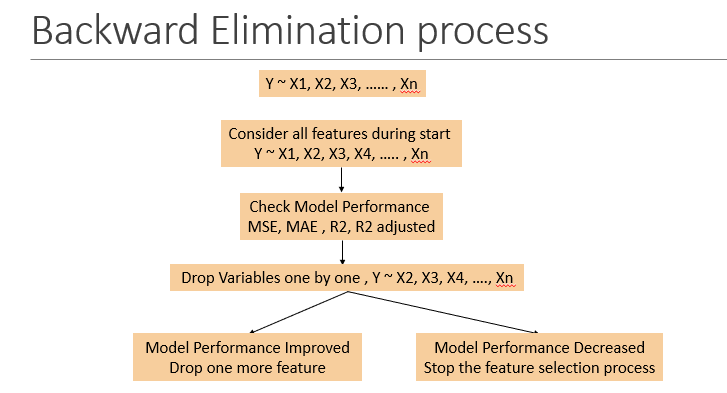

Two Pipelines
1. Feature Selection
2. Final Preprocessing Pipline (Applied only on selected features)

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1: Read the dataset

In [3]:
import pandas as pd 
df = pd.read_csv("Cars93.csv", na_values = ["", "NA"], keep_default_na = False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y(Weight)
id dropped because statistically insignificant

In [8]:
X = df.drop(columns=["id", "Weight"])
Y = df[["Weight"]]

In [9]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [10]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Step 4: Feature selection pipeline
Categorical - OrdinalEncoding

In [11]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [12]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [16]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

In [17]:
pre1 = ColumnTransformer([
    ("num", num_pipe1, con),
    ("cat", cat_pipe1, cat)
]).set_output(transform="pandas")

In [18]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


In [19]:
X_pre.isna().sum()

num__Min.Price             0
num__Price                 0
num__Max.Price             0
num__MPG.city              0
num__MPG.highway           0
num__EngineSize            0
num__Horsepower            0
num__RPM                   0
num__Rev.per.mile          0
num__Fuel.tank.capacity    0
num__Passengers            0
num__Length                0
num__Wheelbase             0
num__Width                 0
num__Turn.circle           0
num__Rear.seat.room        0
num__Luggage.room          0
cat__Manufacturer          0
cat__Model                 0
cat__Type                  0
cat__AirBags               0
cat__DriveTrain            0
cat__Cylinders             0
cat__Man.trans.avail       0
cat__Origin                0
cat__Make                  0
dtype: int64

In [20]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

### Feature selection

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [22]:
# change direction to backward
sel = SequentialFeatureSelector(
    LinearRegression(), direction="backward", n_features_to_select="auto")
sel.fit(X_pre, Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__Price', 'num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'cat__Manufacturer', 'cat__Type', 'cat__AirBags',
       'cat__Cylinders', 'cat__Origin'], dtype=object)

In [23]:
len(imp_cols)

13

In [24]:
imp_cols[0]

'num__Price'

In [25]:
imp_cols[0].split("__")

['num', 'Price']

In [26]:
imp_cols[0].split("__")[1]

'Price'

In [27]:
sel_cols = [col.split("__")[1] for col in imp_cols]
sel_cols

['Price',
 'MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Manufacturer',
 'Type',
 'AirBags',
 'Cylinders',
 'Origin']

In [28]:
X_sel = X[sel_cols]
X_sel.head()

,Price,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Manufacturer,Type,AirBags,Cylinders,Origin
0,15.9,31,140,6300,13.2,5,177,102,Acura,Small,None,4,non-USA
1,33.9,25,200,5500,18.0,5,195,115,Acura,Midsize,Driver & Passenger,6,non-USA
2,29.1,26,172,5500,16.9,5,180,102,Audi,Compact,Driver only,6,non-USA
3,37.7,26,172,5500,21.1,6,193,106,Audi,Midsize,NaN,6,non-USA
4,30.0,30,208,5700,21.1,4,186,109,BMW,Midsize,Driver only,4,non-USA


### Feature Selection completed

### Create a final pipeline
cat - OneHotEncoder

In [29]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [30]:
cat_sel

['Manufacturer', 'Type', 'AirBags', 'Cylinders', 'Origin']

In [31]:
con_sel

['Price',
 'MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase']

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [34]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [35]:
pre2 = ColumnTransformer([
    ("num", num_pipe2, con_sel),
    ("cat", cat_pipe2, cat_sel)
]).set_output(transform="pandas")

In [36]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,-0.375720,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.497844,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.998227,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.893374,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.091905,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Price', 'MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'AirBags',
                                  'Cylinders', 'Origin'])])

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X_sel_pre, Y, test_size=0.2, random_state=21
)

In [39]:
xtrain.head()

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
57,1.289670,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,-0.564892,0.155356,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31,-0.979424,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.840305,-0.876650,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62,0.685966,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.467905,0.450214,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,-0.021825,-0.204794,1.347077,0.875050,0.409445,0.884457,1.294143,1.334791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,1.726835,-0.581941,1.270290,-1.146804,1.022624,0.884457,2.464647,1.924508,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [40]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [41]:
xtest.head()

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
23,-0.854520,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-0.771452,-1.024079,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.332071,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,0.332071,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21,1.039862,-0.581941,0.060893,-0.809828,-0.203734,0.884457,1.362996,0.892502,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17,-0.073868,-0.581941,0.502419,-1.820755,1.942392,0.884457,2.120381,1.777079,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [42]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [43]:
xtrain.shape

(74, 57)

In [44]:
xtest.shape

(19, 57)

### Model Building

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [46]:
model.score(xtrain, ytrain)

0.9859914776613601

In [47]:
model.score(xtest, ytest)

0.9133161505760075

### Model Evaluation

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [49]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 : {r2:.4f}")

In [50]:
evaluate_model(model, xtrain, ytrain)

MSE : 4712.06
RMSE : 68.64
MAE : 49.90
MAPE : 0.0170
R2 : 0.9860


In [51]:
evaluate_model(model, xtest, ytest)

MSE : 31439.97
RMSE : 177.31
MAE : 139.25
MAPE : 0.0433
R2 : 0.9133


### Out of sample prediction

In [52]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [53]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Price', 'MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'AirBags',
                                  'Cylinders', 'Origin'])])

In [54]:
xnew_pre = pre2.transform(xnew)
xnew_pre

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,1.893374,-0.581941,0.540813,0.369586,-0.510323,0.884457,0.467905,0.302785,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.875337,0.360925,-0.649388,-0.135877,-0.449005,-0.083243,-0.151773,-0.434362,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.375720,-0.016221,-0.649388,-0.135877,-0.050439,0.884457,1.018731,0.597644,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.352122,-0.770514,2.134145,2.054464,1.022624,-2.986345,-0.978011,-1.171509,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-1.083511,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.391130,-1.613797,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
preds = model.predict(xnew_pre)
preds

array([[3695.74554298],
       [2714.90553984],
       [3143.91102484],
       [2895.        ],
       [2281.07817625]])

In [56]:
xnew["Weight_pred"] = preds

In [57]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3695.745543
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2714.905540
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3143.911025
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.000000
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2281.078176


In [58]:
xnew.to_csv("BackwardResults.csv") # Change filename